In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import numpy as np

from made import MADE


In [3]:
import matplotlib.pyplot as plt


In [4]:
from data.toydata import ToyDataset


In [5]:
from flows import create_iaf
from flows import create_paf


In [6]:
from train import train_forward


In [85]:
dim_input = 2
dim_hidden = [10,10,10]
num_trans = 5
perm_type = 'identity'


In [86]:
dataset = ToyDataset()


In [87]:
base = dataset.data_distr


In [88]:
iaf_flow = create_iaf(dim_input, dim_hidden, num_trans, perm_type)


In [89]:
base_distr = iaf_flow.get_base_distr()


In [90]:
optimizer = torch.optim.Adam(iaf_flow.parameters())


In [92]:
train_forward(iaf_flow, base_distr, dataset.get_training_data(), optimizer, epochs=200, print_n=10)


tensor(4.5434, grad_fn=<AddBackward0>)
tensor(4.6954, grad_fn=<AddBackward0>)
tensor(4.6939, grad_fn=<AddBackward0>)
tensor(4.8195, grad_fn=<AddBackward0>)
tensor(4.0068, grad_fn=<AddBackward0>)
tensor(5.0773, grad_fn=<AddBackward0>)
tensor(4.5806, grad_fn=<AddBackward0>)
tensor(5.2960, grad_fn=<AddBackward0>)
tensor(4.8285, grad_fn=<AddBackward0>)
tensor(5.6690, grad_fn=<AddBackward0>)
tensor(4.6435, grad_fn=<AddBackward0>)
tensor(5.1117, grad_fn=<AddBackward0>)
tensor(4.5242, grad_fn=<AddBackward0>)
tensor(4.9317, grad_fn=<AddBackward0>)
tensor(4.8306, grad_fn=<AddBackward0>)
tensor(4.2710, grad_fn=<AddBackward0>)
tensor(5.0181, grad_fn=<AddBackward0>)
tensor(4.6543, grad_fn=<AddBackward0>)
tensor(3.9336, grad_fn=<AddBackward0>)
tensor(4.2761, grad_fn=<AddBackward0>)


In [93]:
test_data = dataset.get_test_data()

In [94]:
test_data[1:2,:].size()

torch.Size([1, 2])

In [95]:
z,log_det = iaf_flow.evaluate(dataset.get_training_data())

In [96]:
torch.abs(log_det - dataset.evaluate(dataset.get_training_data()))

tensor([4.2358e+00, 2.8012e+00, 1.0459e-01, 3.0619e-01, 2.8680e-02, 1.8671e-01,
        1.9901e+00, 1.2870e+00, 2.1436e-01, 5.6743e-01, 3.6661e-01, 2.4906e-01,
        1.0837e-01, 5.4322e-01, 5.7665e-01, 2.2817e+00, 5.9719e-01, 3.1826e-01,
        3.3357e-01, 2.1547e-01, 1.0231e+00, 1.0189e-01, 1.6225e-01, 6.0467e-01,
        1.5843e-01, 7.8160e+00, 4.6538e-02, 6.0500e-02, 3.0013e+00, 3.0784e-01,
        9.0325e-02, 3.3121e-02, 7.4146e-02, 3.2264e-01, 1.1895e+00, 7.0299e-01,
        8.9732e-02, 6.8961e-01, 3.4797e+00, 2.4469e-01, 4.2227e-01, 5.3253e-02,
        1.9230e-01, 1.6894e-01, 5.7414e-01, 3.3075e-02, 9.6881e-02, 6.0020e-02,
        7.4651e-01, 3.3628e-01, 3.1440e-02, 2.7238e-02, 1.3957e+00, 3.9081e-01,
        2.0685e-01, 9.1602e-01, 2.9317e-01, 5.2108e-01, 1.5983e-01, 7.9295e-02,
        9.2443e-01, 2.7837e-02, 2.6755e-01, 1.6868e+00, 3.7540e+00, 6.8091e-02,
        6.1817e-01, 1.9741e-02, 2.9584e-02, 4.9192e+00, 1.0742e+00, 6.6446e-01,
        1.8030e+00, 2.1372e-01, 1.3144e+

In [97]:
z,log_det = iaf_flow.evaluate(dataset.get_test_data())

In [98]:
dataset.evaluate(dataset.get_test_data())

tensor([-1.5149, -1.5171, -1.7359, -2.0207, -2.1356, -1.8504, -2.1769, -2.7919,
        -1.4658, -2.2219, -4.7504, -1.9412, -1.6090, -3.0453, -2.2939, -1.4929,
        -1.7156, -3.3933, -3.0508, -1.7157, -1.5311, -6.6092, -1.5508, -1.4070,
        -1.7654, -1.5439, -3.0699, -2.6828, -3.2872, -2.5699, -3.3004, -2.4357,
        -1.6240, -4.0140, -2.2043, -1.9927, -2.0161, -3.1101, -2.8112, -1.5048,
        -2.4909, -3.8815, -1.9726, -2.3693, -4.1256, -2.2613, -1.9850, -1.6199,
        -3.7882, -2.2894, -5.4773, -3.3782, -2.2416, -1.4324, -1.6473, -4.6021,
        -1.8008, -1.7904, -4.8595, -1.7431, -2.8544, -7.1733, -1.4305, -1.4068,
        -1.7187, -1.9848, -2.8992, -1.3324, -1.9346, -1.7453, -2.8965, -3.1196,
        -2.4805, -1.9470, -1.5976, -1.6936, -2.7738, -1.6647, -1.4016, -3.0775,
        -3.7930, -1.9758, -2.5652, -2.5182, -2.3677, -1.7940, -1.8495, -1.4494,
        -2.3990, -3.3546, -2.0064, -1.3708, -9.1077, -1.6194, -2.5052, -1.3760,
        -2.1404, -3.4373, -1.7424, -2.49

In [99]:
log_det

tensor([ -1.5157,  -1.3771,  -1.3766,  -1.6170,  -3.1653,  -2.9352,  -2.9137,
         -3.3411,  -1.3773,  -2.2091,  -6.5627,  -1.4729,  -1.3852,  -5.3702,
         -1.9282,  -1.4523,  -1.7007,  -2.5116,  -3.5962,  -2.3021,  -2.1116,
         -7.4554,  -1.3394,  -1.6681,  -1.7766,  -1.5729,  -3.9239,  -2.6175,
         -6.7707,  -3.6637,  -2.9981,  -2.0748,  -1.6364,  -4.8920,  -2.8187,
         -3.2105,  -1.9606,  -3.2316,  -2.7150,  -1.3662,  -1.6206,  -3.6987,
         -1.7468,  -2.2036,  -8.0587,  -2.2148,  -3.4038,  -1.6166,  -4.1950,
         -1.5510,  -5.9698,  -3.0902,  -2.4103,  -1.4848,  -1.6441,  -3.3170,
         -1.7716,  -2.2988,  -6.9526,  -2.4416,  -5.3254, -10.7142,  -1.5998,
         -1.8319,  -1.3760,  -1.8989,  -3.6235,  -1.4211,  -2.3391,  -1.5442,
         -2.9178,  -2.7735,  -2.5066,  -2.2329,  -2.3216,  -2.0736,  -3.7122,
         -1.4210,  -1.3435,  -3.4095,  -3.4083,  -2.1219,  -3.1289,  -1.6161,
         -2.5221,  -2.0222,  -1.8020,  -1.4580,  -3.3992,  -2.85

In [100]:
test_data = dataset.get_test_data()

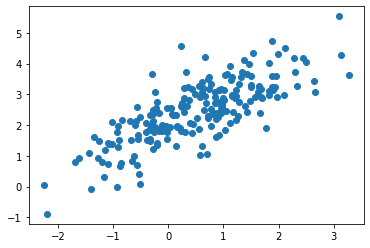

In [101]:
plt.scatter(test_data[:, 0], test_data[:, 1])

In [102]:
sample_data, _ = iaf_flow.sample(200)
sample_data = sample_data[-1]
sample_data = sample_data.detach().numpy()

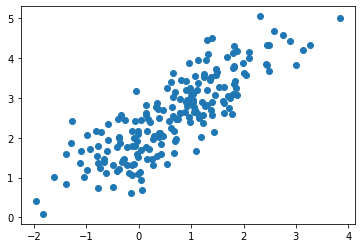

In [103]:
plt.scatter(sample_data[:, 0], sample_data[:, 1])